In [2]:
!pip install emoji

  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=d9c78c4532e6cc63c1422bda19b76c0beef259a4db9aa0b9b8e8441a77e1119d
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\0e\d1\c5\63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji


In [157]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [158]:
def date_time(line):
    pattern = "^\["
    result = regex.match(pattern, line)
    if result:
        return True
    return False

In [164]:
def find_author(message):
    message = message.split(":")
    if len(message) == 2:
        return True
    return False

In [165]:
def getDatapoint(line):
    splitline = line.split("] ")
    dateTime = splitline[0].strip("[")
    date, time = dateTime.split(" ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = None
    return date, time, author, message

In [166]:
data = []
conversation = "_chat.txt"
with open(conversation, encoding = "utf-8") as fp:
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if find_author:
                date, time, author, message = getDatapoint(line)
                data.append([date, time, author, message])
            # messageBuffer.clear()
            # date, time, author, message = getDatapoint(line)
            # messageBuffer.append(message)
        else:
            messageBuffer.append(line)

ValueError: not enough values to unpack (expected 2, got 1)

In [167]:
df = pd.DataFrame(data, columns = ["Date", "Time", "Author", "Message"])
df

,Date,Time,Author,Message
0,21.09.2017,10:39:19,Budak,‎Mesajlar ve aramalar uçtan uca şifrelidir. Wh...
1,21.09.2017,10:40:08,Emre Üstündağ,Bunlardan hangilerini yapabiliriz kek
2,21.09.2017,10:40:19,Emre Üstündağ,Günaydın bu arada
3,21.09.2017,10:40:38,Budak,sadece tasarım mı?
4,21.09.2017,10:40:43,Budak,baskı da olacak mı kanka?
...,...,...,...,...
8309,2.07.2019,14:50:08,Budak,ücretsiz
8310,2.07.2019,14:51:25,Emre Üstündağ,Hgt ye 12 buçuk dolar ödedim az önce
8311,2.07.2019,14:51:33,Emre Üstündağ,Reco indirim yaptırdım demiş bi de
8312,2.07.2019,14:51:46,Emre Üstündağ,Çakal beni mi yiyo anlamadım 😅


In [170]:
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Time,Author,Message
0,2017-09-21,10:39:19,Budak,‎Mesajlar ve aramalar uçtan uca şifrelidir. Wh...
1,2017-09-21,10:40:08,Emre Üstündağ,Bunlardan hangilerini yapabiliriz kek
2,2017-09-21,10:40:19,Emre Üstündağ,Günaydın bu arada
3,2017-09-21,10:40:38,Budak,sadece tasarım mı?
4,2017-09-21,10:40:43,Budak,baskı da olacak mı kanka?
...,...,...,...,...
8309,2019-02-07,14:50:08,Budak,ücretsiz
8310,2019-02-07,14:51:25,Emre Üstündağ,Hgt ye 12 buçuk dolar ödedim az önce
8311,2019-02-07,14:51:33,Emre Üstündağ,Reco indirim yaptırdım demiş bi de
8312,2019-02-07,14:51:46,Emre Üstündağ,Çakal beni mi yiyo anlamadım 😅


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8314 non-null   datetime64[ns]
 1   Time     8314 non-null   object        
 2   Author   7704 non-null   object        
 3   Message  8314 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 259.9+ KB


In [172]:
df.isnull().sum()

Date         0
Time         0
Author     610
Message      0
dtype: int64

In [173]:
df.dropna(inplace = True)

In [178]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r"\X", text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [179]:
df

,Date,Time,Author,Message,emoji
0,2017-09-21,10:39:19,Budak,‎Mesajlar ve aramalar uçtan uca şifrelidir. Wh...,[]
1,2017-09-21,10:40:08,Emre Üstündağ,Bunlardan hangilerini yapabiliriz kek,[]
2,2017-09-21,10:40:19,Emre Üstündağ,Günaydın bu arada,[]
3,2017-09-21,10:40:38,Budak,sadece tasarım mı?,[]
4,2017-09-21,10:40:43,Budak,baskı da olacak mı kanka?,[]
...,...,...,...,...,...
8309,2019-02-07,14:50:08,Budak,ücretsiz,[]
8310,2019-02-07,14:51:25,Emre Üstündağ,Hgt ye 12 buçuk dolar ödedim az önce,[]
8311,2019-02-07,14:51:33,Emre Üstündağ,Reco indirim yaptırdım demiş bi de,[]
8312,2019-02-07,14:51:46,Emre Üstündağ,Çakal beni mi yiyo anlamadım 😅,[😅]


In [184]:
URLPATTERN = r"https?://\S+"
df["urlcount"] = df.Message.apply(lambda x:  regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [182]:
emojis = sum(df["emoji"].str.len())

In [185]:
print("Chat with numbers")
print("Number of emojis: ", emojis)
print("Number of text: ", df.shape[0])
print("Number of link: ", links)

Chat with numbers
Number of emojis:  914
Number of text:  7704
Number of link:  0


In [189]:
df["Letter_Count"] = df["Message"].apply(lambda s : len(s))
df["Word_Count"] = df["Message"].apply(lambda s : len(s.split(" ")))
df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count
0,2017-09-21,10:39:19,Budak,‎Mesajlar ve aramalar uçtan uca şifrelidir. Wh...,[],0,158,23
1,2017-09-21,10:40:08,Emre Üstündağ,Bunlardan hangilerini yapabiliriz kek,[],0,37,4
2,2017-09-21,10:40:19,Emre Üstündağ,Günaydın bu arada,[],0,17,3
3,2017-09-21,10:40:38,Budak,sadece tasarım mı?,[],0,18,3
4,2017-09-21,10:40:43,Budak,baskı da olacak mı kanka?,[],0,25,5
...,...,...,...,...,...,...,...,...
8309,2019-02-07,14:50:08,Budak,ücretsiz,[],0,8,1
8310,2019-02-07,14:51:25,Emre Üstündağ,Hgt ye 12 buçuk dolar ödedim az önce,[],0,36,8
8311,2019-02-07,14:51:33,Emre Üstündağ,Reco indirim yaptırdım demiş bi de,[],0,34,6
8312,2019-02-07,14:51:46,Emre Üstündağ,Çakal beni mi yiyo anlamadım 😅,[😅],0,30,6


In [202]:
emojis_list = list(set([a for b in df.emoji for a in b]))
emojis = len(emojis_list)
emojis

43

In [210]:
all_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(all_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key = lambda x: x[1], reverse = True)
    
emoji_df = pd.DataFrame(emoji_dict, columns = ["emoji", "count"])
emoji_df

,emoji,count
0,😂,264
1,👍,187
2,😅,179
3,😊,53
4,🤣,50
5,😇,33
6,🐄,26
7,😁,24
8,👍🏻,21
9,🤯,7


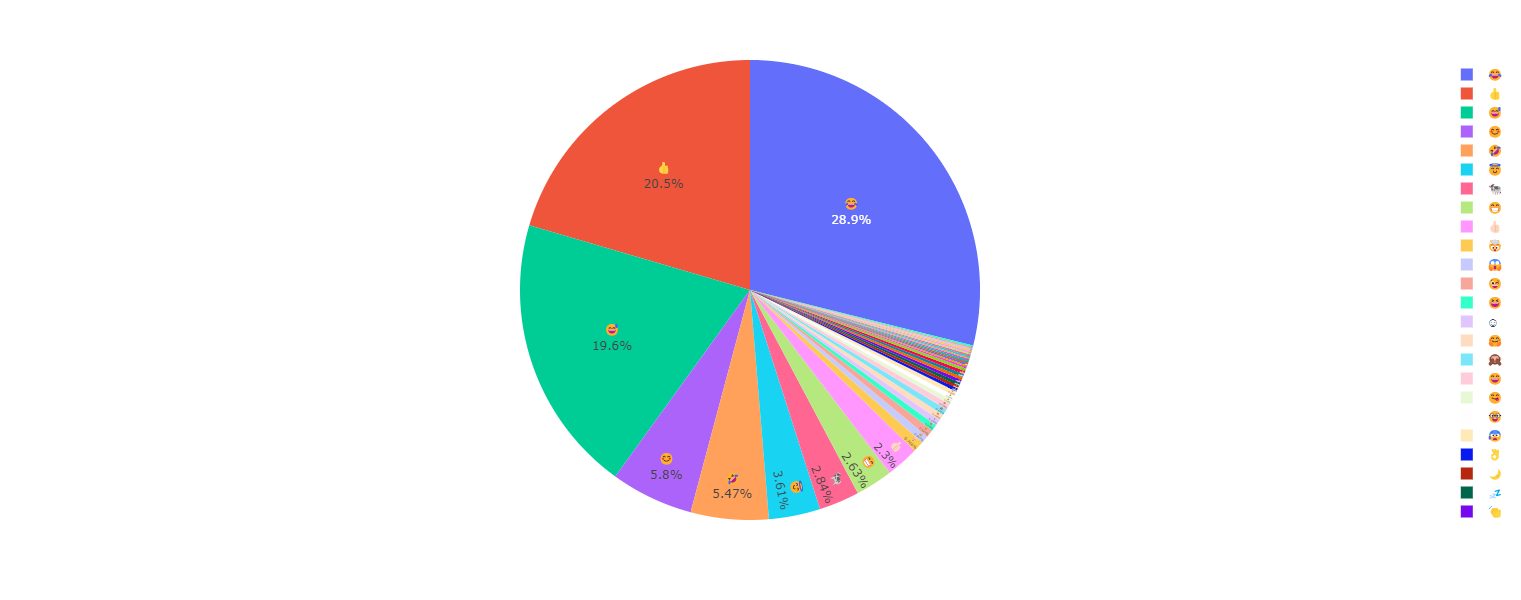

In [217]:
import plotly.express as px
fig = px.pie(emoji_df, values = "count", names = "emoji", width = 800, height = 600)
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()

There are 264209 words in all messages


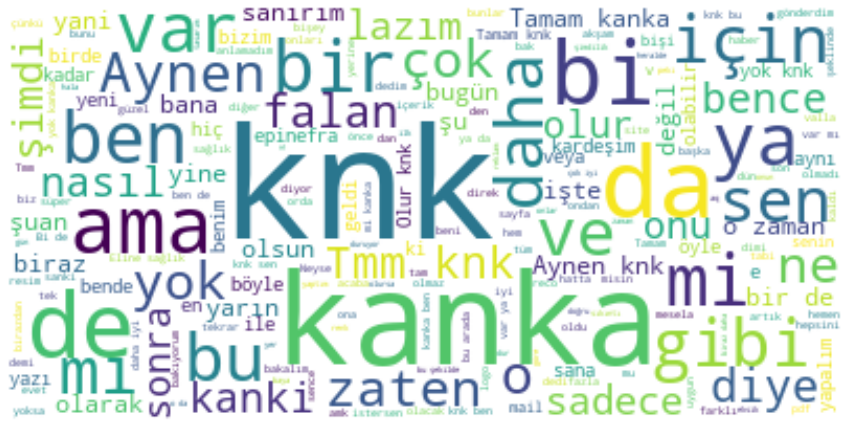

In [219]:
text = " ".join(review for review in df.Message)
print("There are {} words in all messages".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
# Display the generated image
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Author name:  Budak


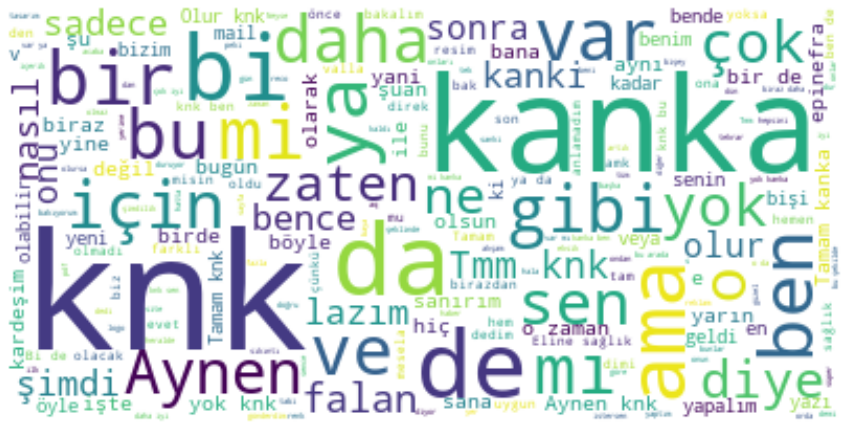

Author name:  Emre Üstündağ


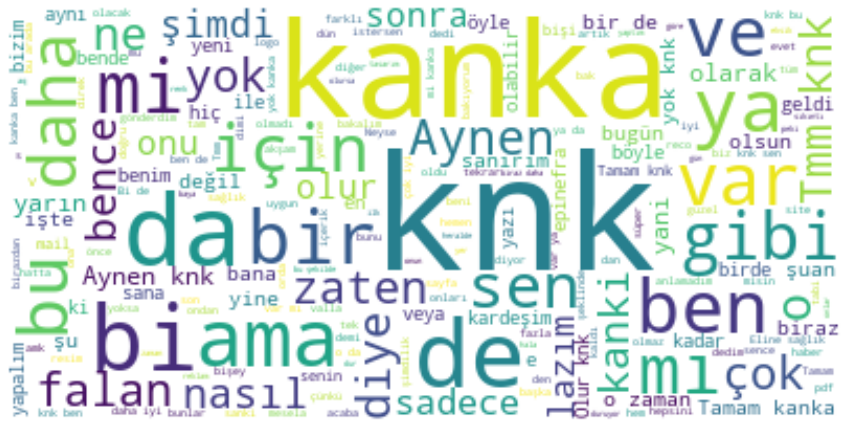

In [221]:
l = ["Budak", "Emre Üstündağ"]
for i in range(len(l)):
    dummy_df = df[df["Author"] == l[i]]
    text = " ".join(review for review in df.Message)
    stopwords = set(STOPWORDS)
    print("Author name: ", l[i])
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
    # Display the generated image
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()